# Testes com extração NCM.xls
Extração realizada no DW, consulta Dashboard Laudos NCM
DashBoard Laudos - Estatistica NCM

{ANO REGIS}=2016:2016, 2017:2017, 2018:2018 E {PESO LIQ MERC IMP} >= 100000


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
caminho = os.path.join('..', 'app', 'datasources')
for name in os.listdir(caminho):
    if 'xls' in name: print(name)

NCM.xlsx
v111518.xlsx
v12.xlsx
v1324b.xlsx
v22263031.xlsx
v7b.xlsx


In [2]:
df_ncm = pd.read_excel(os.path.join(caminho, 'NCM.xlsx'), header=4)
df_ncm['PESO LIQ MERC IMP POR'] = df_ncm['PESO LIQ MERC IMP'] / df_ncm['PESO LIQ MERC IMP'].sum() # Converter para porcentagem
df_ncm['COD PAIS ORIG DEST'] = pd.to_numeric(df_ncm['COD PAIS ORIG DEST'], errors='coerce', downcast='unsigned')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

D:\Users\25052288840\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [3]:
df_ncm.head()

,COD PAIS ORIG DEST,PAIS ORIGEM DESTINO,COD CAPIT NCM,CAPITULO NCM,MES REGIS,Métrica,PESO LIQ MERC IMP,PESO LIQ MERC IMP POR
0,17.00,Albânia,72,"Ferro fundido, ferro e aço",Nov 2016,nan,108928.00,0.00
1,17.00,Albânia,72,"Ferro fundido, ferro e aço",Dez 2016,nan,107828.00,0.00
2,17.00,Albânia,76,Alumínio e suas obras,Out 2017,nan,305170.00,0.00
3,23.00,Alemanha,3,"Peixes e crustáceos, moluscos e outros inverte...",Out 2016,nan,2558244.00,0.00
4,23.00,Alemanha,5,"Outros produtos de origem animal, não especifi...",Jan 2016,nan,276093.97,0.00


In [4]:
df_ncm[df_ncm['COD CAPIT NCM'] == 72]['CAPITULO NCM'].tolist()

['Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro fundido, ferro e aço',
 'Ferro 

In [5]:
df_pesopais = df_ncm.groupby(
            ['COD PAIS ORIG DEST', 'PAIS ORIGEM DESTINO'], as_index=False
        )['PESO LIQ MERC IMP POR'].sum()
df_pesopais.columns = ['codpais', 'PaisOrigem', 'pesototal']


In [6]:
df_pesopais.head()

,codpais,PaisOrigem,pesototal
0,17.00,Albânia,0.00
1,23.00,Alemanha,0.02
2,40.00,Angola,0.00
3,47.00,Antilhas Holandesas,0.00
4,53.00,Arábia Saudita,0.03


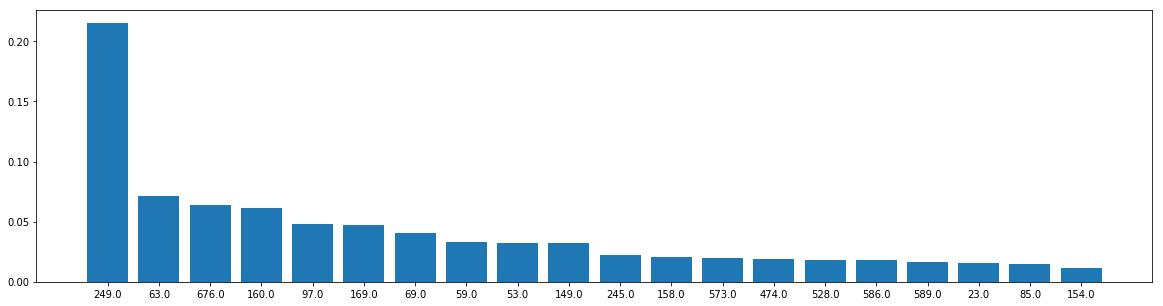

In [7]:
%matplotlib inline
plt.figure(figsize=(20,5))
df_pesopais = df_pesopais.sort_values(by='pesototal', ascending=False)
x = df_pesopais['pesototal'][:20]
labels = df_pesopais['codpais'][:20]
plt.bar(range(len(x)), x) #, labels)
plt.xticks(range(len(x)), labels)
plt.show()

In [8]:
df_pesoncm = df_ncm.groupby(
            ['COD CAPIT NCM', 'CAPITULO NCM'], as_index=False
        )['PESO LIQ MERC IMP POR'].sum()
df_pesoncm.columns = ['codcapncm', 'CapituloNCM', 'pesototal']

In [9]:
df_pesoncm.head()

,codcapncm,CapituloNCM,pesototal
0,1,Animais vivos,0.00
1,2,"Carnes e miudezas, comestíveis",0.00
2,3,"Peixes e crustáceos, moluscos e outros inverte...",0.00
3,4,Leite e lacticínios; ovos de aves; mel natural...,0.00
4,5,"Outros produtos de origem animal, não especifi...",0.00


In [10]:
df_filtered = df_pesoncm[df_pesoncm['codcapncm'].isin([27])]

In [11]:
df_filtered

,codcapncm,CapituloNCM,pesototal
26,27,"Combust., óleos minerais, mat. betum., ceras",0.45


In [15]:
caps_ncm = df_pesoncm['codcapncm'].unique
[{'label': str(value), 'value': value}
           for value in df_pesoncm['codcapncm'].unique()]

[{'label': '1', 'value': 1},
 {'label': '2', 'value': 2},
 {'label': '3', 'value': 3},
 {'label': '4', 'value': 4},
 {'label': '5', 'value': 5},
 {'label': '6', 'value': 6},
 {'label': '7', 'value': 7},
 {'label': '8', 'value': 8},
 {'label': '9', 'value': 9},
 {'label': '10', 'value': 10},
 {'label': '11', 'value': 11},
 {'label': '12', 'value': 12},
 {'label': '13', 'value': 13},
 {'label': '14', 'value': 14},
 {'label': '15', 'value': 15},
 {'label': '16', 'value': 16},
 {'label': '17', 'value': 17},
 {'label': '18', 'value': 18},
 {'label': '19', 'value': 19},
 {'label': '20', 'value': 20},
 {'label': '21', 'value': 21},
 {'label': '22', 'value': 22},
 {'label': '23', 'value': 23},
 {'label': '24', 'value': 24},
 {'label': '25', 'value': 25},
 {'label': '26', 'value': 26},
 {'label': '27', 'value': 27},
 {'label': '28', 'value': 28},
 {'label': '29', 'value': 29},
 {'label': '30', 'value': 30},
 {'label': '31', 'value': 31},
 {'label': '32', 'value': 32},
 {'label': '33', 'value': 

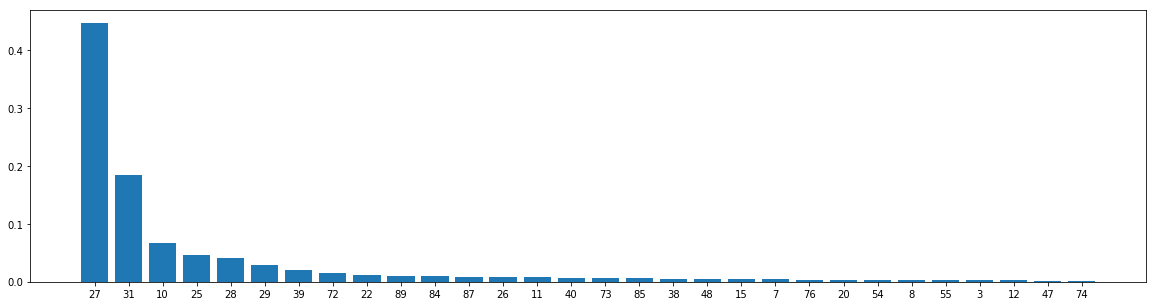

In [13]:
%matplotlib inline
plt.figure(figsize=(20,5))
df_pesoncm = df_pesoncm.sort_values(by='pesototal', ascending=False)
x = df_pesoncm['pesototal'][:30]
labels = df_pesoncm['codcapncm'][:30]
plt.bar(range(len(x)), x) #, labels)
plt.xticks(range(len(x)), labels)
plt.show()

In [21]:
import mysql.connector as MySqlDB
db = MySqlDB.connect(host='localhost', user='root', password='sala313')

# Laudos: qtde por país
sql = 'SELECT origemid as codpais, COUNT(*) as total ' + \
    'FROM LAUDOS.itenssat ' + \
    'GROUP BY origemid ' + \
    'ORDER BY total DESC; '
df_qtdelaudospais = pd.read_sql(sql, db)
df_pais_x_peso = df_qtdelaudospais.merge(df_pesopais, on='codpais')

In [22]:
df_pais_x_peso = df_pais_x_peso.sort_values(by='pesototal', ascending=False)
df_pais_x_peso.head(10)

,codpais,total,PaisOrigem,pesototal
0,249.00,3221,Estados Unidos,0.22
15,63.00,104,Argentina,0.07
32,676.00,29,Rússia,0.06
1,160.00,2499,China,0.06
66,97.00,2,Bolívia,0.05
20,169.00,70,Colômbia,0.05
26,69.00,47,Austrália,0.04
49,59.00,7,Argélia,0.03
54,53.00,6,Arábia Saudita,0.03
24,149.00,50,Canadá,0.03


In [23]:
df_qtdelaudospais.head()

,codpais,total
0,249.00,3221
1,160.00,2499
2,23.00,1790
3,1.00,778
4,386.00,494


In [24]:
df_pesoncmpais = df_ncm.groupby(
            ['COD PAIS ORIG DEST',
             'PAIS ORIGEM DESTINO',
             'COD CAPIT NCM',
             'CAPITULO NCM'], as_index=False
        )['PESO LIQ MERC IMP'].sum()
df_pesoncmpais.columns = ['codpais', 'PaisOrigem', 'codcapncm', 'CapituloNCM', 'pesototal']
df_pesoncmpais = df_pesoncmpais.sort_values(by='pesototal', ascending=False)


In [25]:
df_pesoncmpais.head()

,codpais,PaisOrigem,codcapncm,CapituloNCM,pesototal
757,249.00,Estados Unidos,27,"Combust., óleos minerais, mat. betum., ceras",53052104119.76
235,97.00,Bolívia,27,"Combust., óleos minerais, mat. betum., ceras",17590805829.73
82,63.00,Argentina,10,Cereais,16419840943.82
514,169.00,Colômbia,27,"Combust., óleos minerais, mat. betum., ceras",16411744661.73
133,69.00,Austrália,27,"Combust., óleos minerais, mat. betum., ceras",14973757606.72
